In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/dataIncu/'
npz_name = 'Incucyte48.npz'
npz_val_name = 'Incucyte48Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd47SMALL.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 47
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 48
imagey = 48

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         residual = residual, depth = depth, start_kernel = start_kernel, stride = stride, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=47, epochs=250, gridx=1, gridy=1, imagex=48, imagey=48, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd47SMALL.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/dataIncu/', npz_name='Incucyte48.npz', npz_val_name='Incucyte48Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 5180
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
number of  images:	 273
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
(5180, 1, 1, 4) 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_____________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5180 samples, validate on 273 samples
Epoch 1/250
5180/5180 [==============================] - 14s 3ms/step - loss: 1.8847 - acc: 0.2409 - val_loss: 1.4268 - val_acc: 0.6081

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 1.426825592369387, 'val_acc': 0.6080586039102994, 'loss': 1.8847248176810365, 'acc': 0.24092664116540471, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

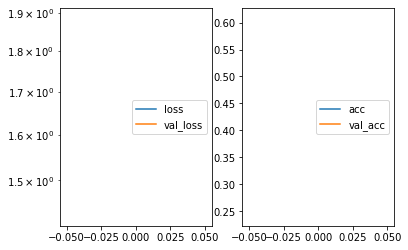

Predicted cell: Cells Probability: [[0.63331807]]
True Cell type: Cells
x [[0.44339484]]
True positional value x 0.2916666666666667
y [[0.7977688]]
True positional value y 0.2916666666666667


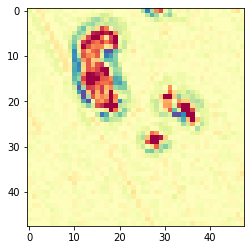

Epoch 2/250
5180/5180 [==============================] - 7s 1ms/step - loss: 1.1784 - acc: 0.7579 - val_loss: 1.0865 - val_acc: 0.8608

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 1.086516179881253, 'val_acc': 0.8608058616791889, 'loss': 1.1783642336208389, 'acc': 0.7579150602624223, 'lr': 1e-06}


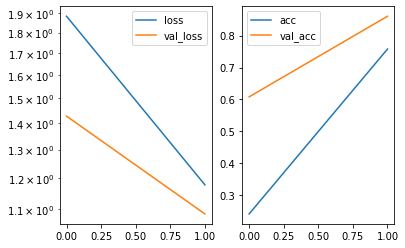

Predicted cell: Cells Probability: [[0.9356678]]
True Cell type: Cells
x [[0.42668146]]
True positional value x 0.2916666666666667
y [[0.38334468]]
True positional value y 0.2916666666666667


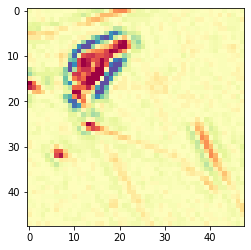

Epoch 3/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.9576 - acc: 0.8635 - val_loss: 0.9954 - val_acc: 0.8718

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9953927513443943, 'val_acc': 0.8717948894797664, 'loss': 0.9575764371161295, 'acc': 0.8635135198652054, 'lr': 1e-06}


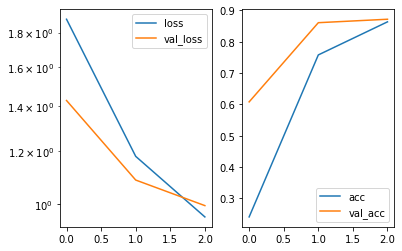

Predicted cell: Cells Probability: [[0.6867699]]
True Cell type: Normal
x [[0.39202672]]
True positional value x 0.5
y [[0.595698]]
True positional value y 0.5


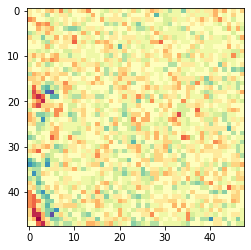

Epoch 4/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.8546 - acc: 0.9023 - val_loss: 0.9091 - val_acc: 0.8828

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9091196837442699, 'val_acc': 0.8827838795089022, 'loss': 0.8545720901728597, 'acc': 0.9023166045719132, 'lr': 1e-06}


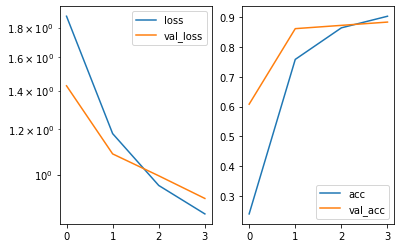

Predicted cell: Cells Probability: [[0.9668679]]
True Cell type: Cells
x [[0.60031384]]
True positional value x 0.7083333333333334
y [[0.49016148]]
True positional value y 0.5


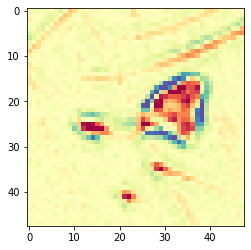

Epoch 5/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.7994 - acc: 0.9504 - val_loss: 0.8655 - val_acc: 0.9524

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8655273019175826, 'val_acc': 0.9523809377527063, 'loss': 0.7994207719117978, 'acc': 0.9503861019049832, 'lr': 1e-06}


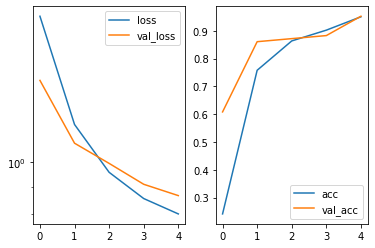

Predicted cell: Cells Probability: [[0.98995703]]
True Cell type: Cells
x [[0.44588545]]
True positional value x 0.2916666666666667
y [[0.6848554]]
True positional value y 0.7083333333333334


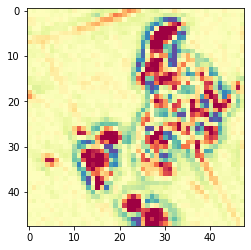

Epoch 6/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.7455 - acc: 0.9581 - val_loss: 0.8266 - val_acc: 0.9670

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8265730205909673, 'val_acc': 0.9670329657229748, 'loss': 0.7454541316363802, 'acc': 0.9581081091667234, 'lr': 1e-06}


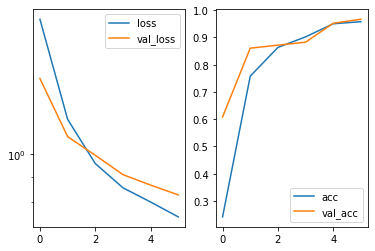

Predicted cell: Normal Probability: [[0.6860824]]
True Cell type: Normal
x [[0.4818312]]
True positional value x 0.5
y [[0.5083872]]
True positional value y 0.5


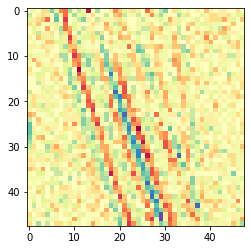

Epoch 7/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.7061 - acc: 0.9639 - val_loss: 0.8044 - val_acc: 0.9817

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8044321026120868, 'val_acc': 0.9816849882349427, 'loss': 0.7061406877970603, 'acc': 0.963899623012911, 'lr': 1e-06}


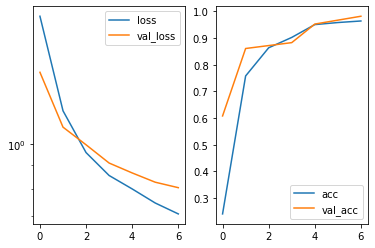

Predicted cell: Cells Probability: [[0.83840394]]
True Cell type: Cells
x [[0.4268771]]
True positional value x 0.5
y [[0.5291179]]
True positional value y 0.5


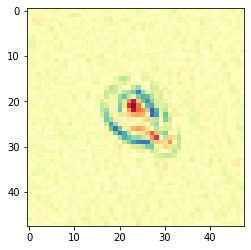

Epoch 8/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.6709 - acc: 0.9683 - val_loss: 0.7929 - val_acc: 0.9817

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.792885612655472, 'val_acc': 0.9816849882349427, 'loss': 0.6708558040696222, 'acc': 0.9683397734487379, 'lr': 1e-06}


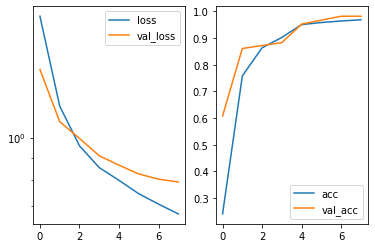

Predicted cell: Cells Probability: [[0.9341917]]
True Cell type: Cells
x [[0.85222685]]
True positional value x 0.7083333333333334
y [[0.39740267]]
True positional value y 0.2916666666666667


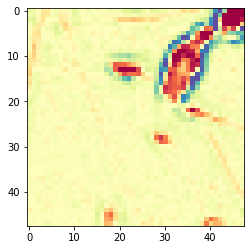

Epoch 9/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.6485 - acc: 0.9722 - val_loss: 0.7866 - val_acc: 0.9817

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7865789423495422, 'val_acc': 0.9816849882349427, 'loss': 0.6485122736816701, 'acc': 0.9722007828329521, 'lr': 1e-06}


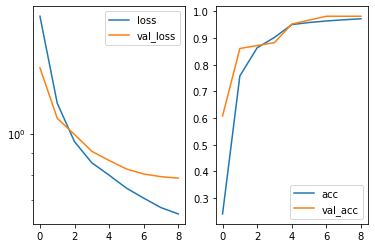

Predicted cell: Normal Probability: [[0.9273347]]
True Cell type: Normal
x [[0.42671832]]
True positional value x 0.5
y [[0.4263898]]
True positional value y 0.5


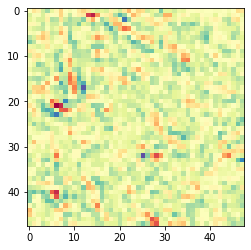

Epoch 10/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.6327 - acc: 0.9724 - val_loss: 0.7846 - val_acc: 0.9817

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7845665506827526, 'val_acc': 0.9816849882349427, 'loss': 0.6327131146629805, 'acc': 0.9723938337624303, 'lr': 1e-06}


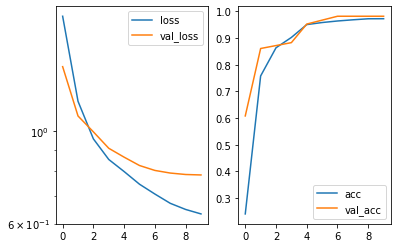

Predicted cell: Cells Probability: [[0.9888911]]
True Cell type: Cells
x [[0.48484984]]
True positional value x 0.7083333333333334
y [[0.73143446]]
True positional value y 0.5


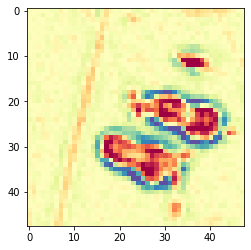

Epoch 11/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.6157 - acc: 0.9732 - val_loss: 0.7779 - val_acc: 0.9817

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7778508230880067, 'val_acc': 0.9816849882349427, 'loss': 0.6156820788346663, 'acc': 0.973166032877668, 'lr': 1e-06}


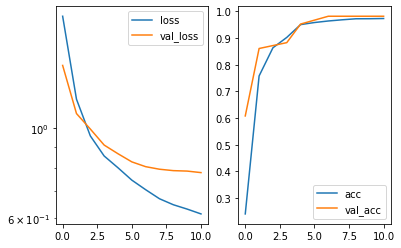

Predicted cell: Cells Probability: [[0.89640075]]
True Cell type: Cells
x [[0.18497376]]
True positional value x 0.2916666666666667
y [[0.70735925]]
True positional value y 0.5


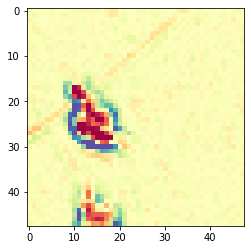

Epoch 12/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.6018 - acc: 0.9732 - val_loss: 0.7738 - val_acc: 0.9817

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.773827884660099, 'val_acc': 0.9816849882349427, 'loss': 0.60181093008822, 'acc': 0.9731660326475342, 'lr': 1e-06}


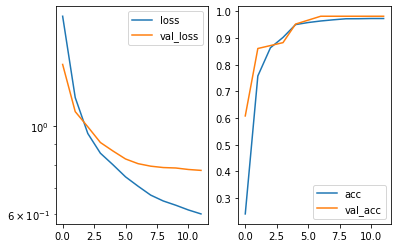

Predicted cell: Cells Probability: [[0.798897]]
True Cell type: Cells
x [[0.44701213]]
True positional value x 0.2916666666666667
y [[0.6618027]]
True positional value y 0.7083333333333334


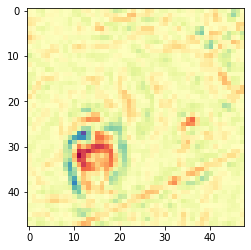

Epoch 13/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5913 - acc: 0.9732 - val_loss: 0.7698 - val_acc: 0.9817

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7697674660455613, 'val_acc': 0.9816849882349427, 'loss': 0.5913343662000531, 'acc': 0.9731660317269992, 'lr': 1e-06}


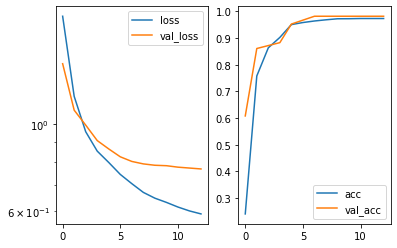

Predicted cell: Cells Probability: [[0.9467723]]
True Cell type: Cells
x [[0.32688838]]
True positional value x 0.2916666666666667
y [[0.41397876]]
True positional value y 0.2916666666666667


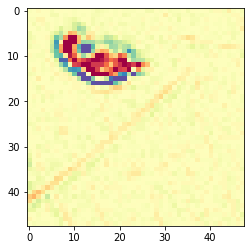

Epoch 14/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5807 - acc: 0.9743 - val_loss: 0.7690 - val_acc: 0.9817

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7690082233904045, 'val_acc': 0.9816849882349427, 'loss': 0.5806975157564671, 'acc': 0.9743243350025309, 'lr': 1e-06}


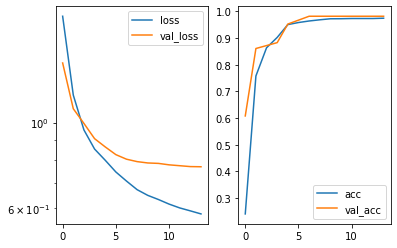

Predicted cell: Cells Probability: [[0.97414464]]
True Cell type: Cells
x [[0.39525726]]
True positional value x 0.5
y [[0.41513664]]
True positional value y 0.5


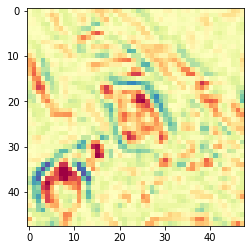

Epoch 15/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5734 - acc: 0.9745 - val_loss: 0.7647 - val_acc: 0.9817

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7646588021582299, 'val_acc': 0.9816849882349427, 'loss': 0.5734483972479478, 'acc': 0.9745173850114741, 'lr': 1e-06}


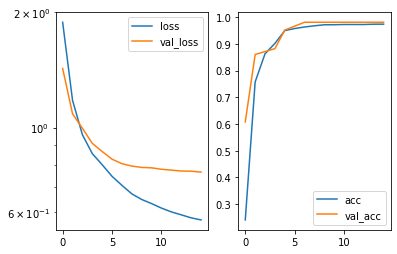

Predicted cell: Cells Probability: [[0.97254395]]
True Cell type: Cells
x [[0.47695205]]
True positional value x 0.2916666666666667
y [[0.7695506]]
True positional value y 0.7083333333333334


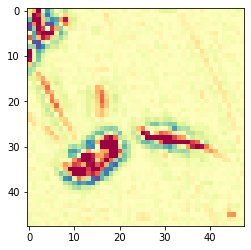

Epoch 16/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5649 - acc: 0.9751 - val_loss: 0.7657 - val_acc: 0.9817

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7656729293393565, 'val_acc': 0.9816849882349427, 'loss': 0.5649199168194214, 'acc': 0.9750965329670999, 'lr': 1e-06}


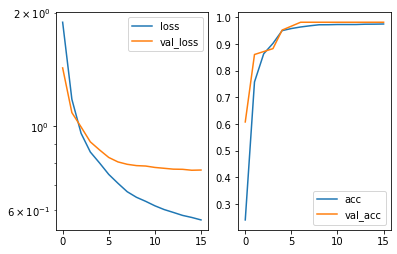

Predicted cell: Cells Probability: [[0.96747154]]
True Cell type: Cells
x [[0.76720846]]
True positional value x 0.7083333333333334
y [[0.5967747]]
True positional value y 0.7083333333333334


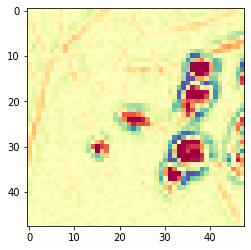

Epoch 17/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5652 - acc: 0.9755 - val_loss: 0.7626 - val_acc: 0.9817

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7626154385643564, 'val_acc': 0.9816849882349427, 'loss': 0.5652204718598988, 'acc': 0.9754826364369926, 'lr': 1e-06}


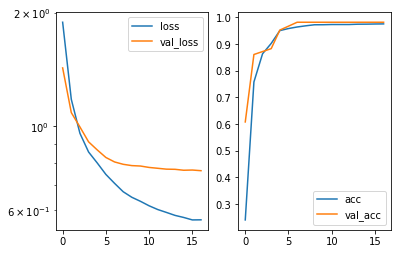

Predicted cell: Cells Probability: [[0.96142644]]
True Cell type: Cells
x [[0.15912998]]
True positional value x 0.2916666666666667
y [[0.6082951]]
True positional value y 0.7083333333333334


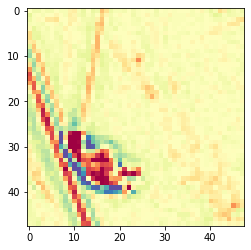

Epoch 18/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5557 - acc: 0.9755 - val_loss: 0.7632 - val_acc: 0.9817

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.763176162819286, 'val_acc': 0.9816849882349427, 'loss': 0.5556694961882926, 'acc': 0.9754826362068588, 'lr': 1e-06}


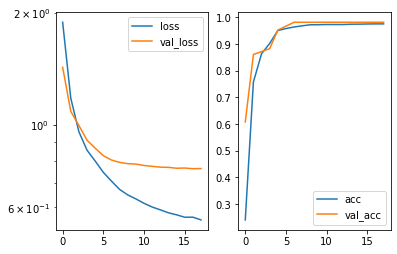

Predicted cell: Cells Probability: [[0.96505016]]
True Cell type: Cells
x [[0.34704238]]
True positional value x 0.5
y [[0.24086873]]
True positional value y 0.2916666666666667


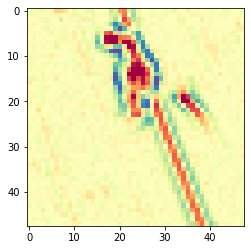

Epoch 19/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5500 - acc: 0.9751 - val_loss: 0.7614 - val_acc: 0.9817

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7613947961356614, 'val_acc': 0.9816849882349427, 'loss': 0.5499718437783967, 'acc': 0.9750965361889725, 'lr': 1e-06}


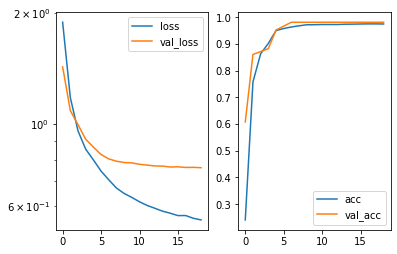

Predicted cell: Cells Probability: [[0.9754008]]
True Cell type: Cells
x [[0.4777353]]
True positional value x 0.2916666666666667
y [[0.76361537]]
True positional value y 0.7083333333333334


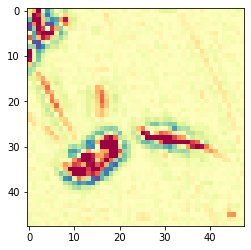

Epoch 20/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5460 - acc: 0.9759 - val_loss: 0.7620 - val_acc: 0.9817

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7619720765085884, 'val_acc': 0.9816849882349427, 'loss': 0.5459933322368902, 'acc': 0.9758687376055478, 'lr': 1e-06}


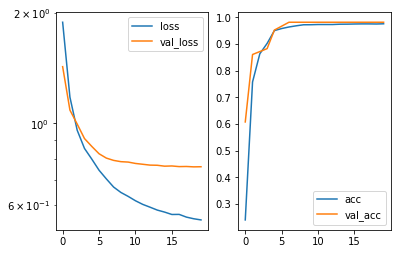

Predicted cell: Cells Probability: [[0.9931466]]
True Cell type: Cells
x [[0.16817828]]
True positional value x 0.7083333333333334
y [[0.34381056]]
True positional value y 0.2916666666666667


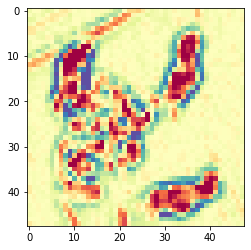

Epoch 21/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5433 - acc: 0.9764 - val_loss: 0.7610 - val_acc: 0.9817

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7609818479517004, 'val_acc': 0.9816849882349427, 'loss': 0.5432710364518478, 'acc': 0.9764478887830462, 'lr': 1e-06}


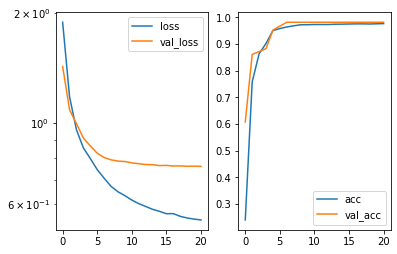

Predicted cell: Cells Probability: [[0.98375976]]
True Cell type: Cells
x [[0.64637786]]
True positional value x 0.5
y [[0.69488215]]
True positional value y 0.7083333333333334


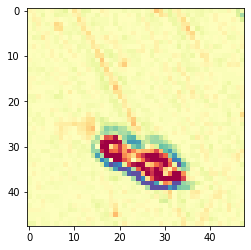

Epoch 22/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5389 - acc: 0.9759 - val_loss: 0.7613 - val_acc: 0.9817

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.761308797549852, 'val_acc': 0.9816849882349427, 'loss': 0.5388677972854334, 'acc': 0.9758687362247452, 'lr': 1e-06}


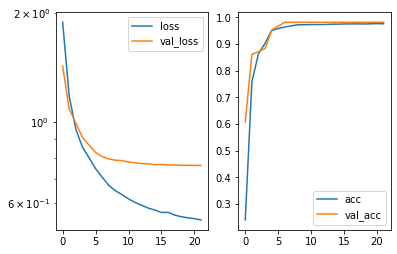

Predicted cell: Cells Probability: [[0.99115413]]
True Cell type: Cells
x [[0.5399682]]
True positional value x 0.5
y [[0.2649019]]
True positional value y 0.5


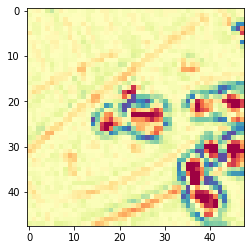

Epoch 23/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5321 - acc: 0.9763 - val_loss: 0.7608 - val_acc: 0.9817

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7608081368736295, 'val_acc': 0.9816849882349427, 'loss': 0.5321440333104962, 'acc': 0.9762548304892875, 'lr': 1e-06}


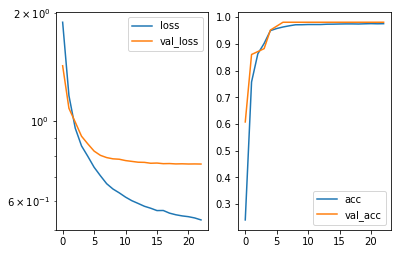

Predicted cell: Cells Probability: [[0.9355622]]
True Cell type: Cells
x [[0.618671]]
True positional value x 0.7083333333333334
y [[0.368896]]
True positional value y 0.5


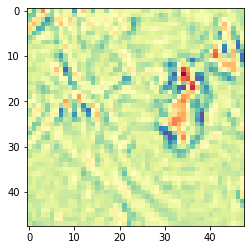

Epoch 24/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5313 - acc: 0.9763 - val_loss: 0.7606 - val_acc: 0.9817

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7606145010326372, 'val_acc': 0.9816849882349427, 'loss': 0.531322460722279, 'acc': 0.976254833941294, 'lr': 1e-06}


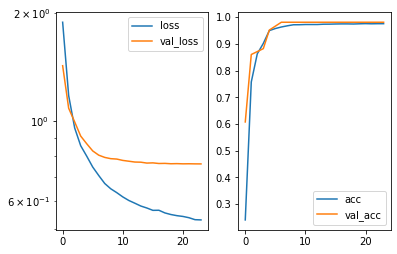

Predicted cell: Cells Probability: [[0.98000354]]
True Cell type: Cells
x [[0.4969597]]
True positional value x 0.5
y [[0.20156054]]
True positional value y 0.5


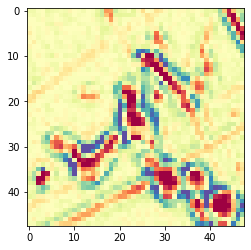

Epoch 25/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5269 - acc: 0.9768 - val_loss: 0.7614 - val_acc: 0.9817

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7613518716214778, 'val_acc': 0.9816849882349427, 'loss': 0.5268634572682693, 'acc': 0.9768339897214676, 'lr': 1e-06}


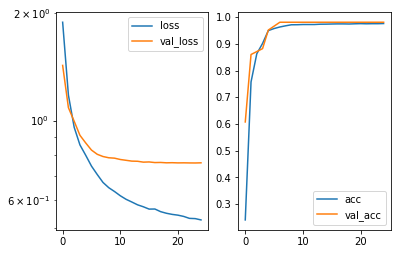

Predicted cell: Cells Probability: [[0.97984743]]
True Cell type: Cells
x [[0.5002744]]
True positional value x 0.5
y [[0.2073227]]
True positional value y 0.2916666666666667


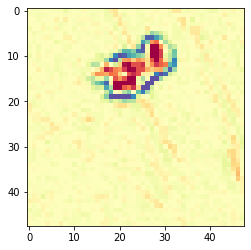

Epoch 26/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.5261 - acc: 0.9763 - val_loss: 0.7609 - val_acc: 0.9817

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7609029713567796, 'val_acc': 0.9816849882349427, 'loss': 0.5261382309856563, 'acc': 0.9762548304892875, 'lr': 1e-06}


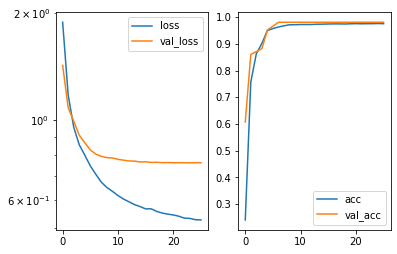

Predicted cell: Cells Probability: [[0.97453237]]
True Cell type: Normal
x [[0.6080904]]
True positional value x 0.5
y [[0.6419437]]
True positional value y 0.5


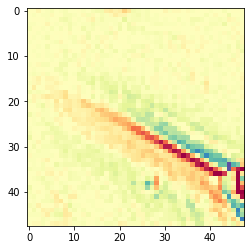

Epoch 27/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.5253 - acc: 0.9772 - val_loss: 0.7626 - val_acc: 0.9817

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7625670919924865, 'val_acc': 0.9816849882349427, 'loss': 0.5252598068428777, 'acc': 0.9772200897393539, 'lr': 1e-06}


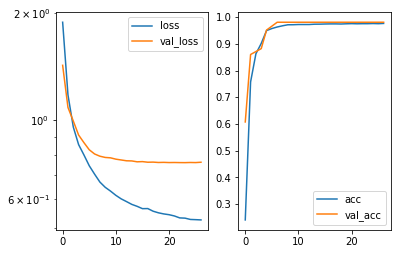

Predicted cell: Cells Probability: [[0.9881918]]
True Cell type: Cells
x [[0.7178468]]
True positional value x 0.7083333333333334
y [[0.12025385]]
True positional value y 0.2916666666666667


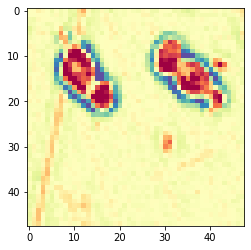

Epoch 28/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5166 - acc: 0.9766 - val_loss: 0.7619 - val_acc: 0.9817

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7619182052629772, 'val_acc': 0.9816849882349427, 'loss': 0.5166298776980073, 'acc': 0.9766409351098492, 'lr': 1e-06}


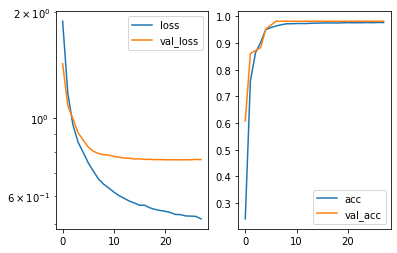

Predicted cell: Normal Probability: [[0.9884376]]
True Cell type: Normal
x [[0.43073863]]
True positional value x 0.5
y [[0.47830844]]
True positional value y 0.5


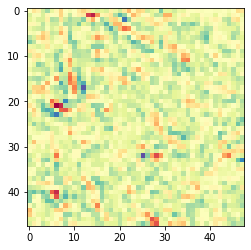

Epoch 29/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5142 - acc: 0.9772 - val_loss: 0.7597 - val_acc: 0.9817

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7596932616862622, 'val_acc': 0.9816849882349427, 'loss': 0.5142220172412607, 'acc': 0.9772200862873475, 'lr': 1e-06}


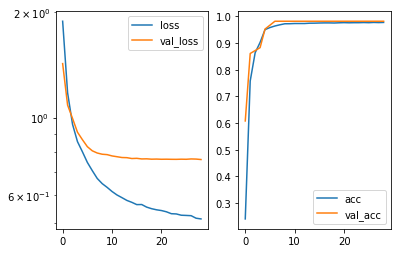

Predicted cell: Cells Probability: [[0.9596676]]
True Cell type: Cells
x [[0.5089508]]
True positional value x 0.5
y [[0.78367823]]
True positional value y 0.7083333333333334


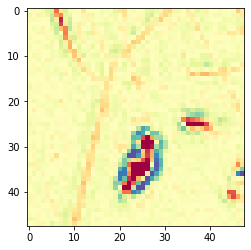

Epoch 30/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5119 - acc: 0.9770 - val_loss: 0.7582 - val_acc: 0.9817

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7581540164930043, 'val_acc': 0.9816849882349427, 'loss': 0.5118728472229136, 'acc': 0.9770270362784044, 'lr': 1e-06}


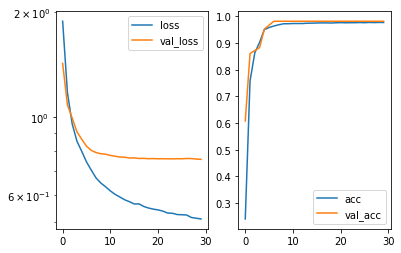

Predicted cell: Cells Probability: [[0.98464936]]
True Cell type: Cells
x [[0.23205535]]
True positional value x 0.2916666666666667
y [[0.36254036]]
True positional value y 0.5


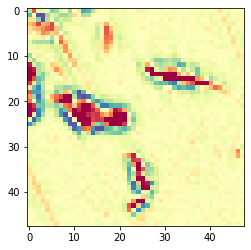

Epoch 31/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5085 - acc: 0.9772 - val_loss: 0.7571 - val_acc: 0.9817

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7570575305393764, 'val_acc': 0.9816849882349427, 'loss': 0.508512564262368, 'acc': 0.9772200862873475, 'lr': 1e-06}


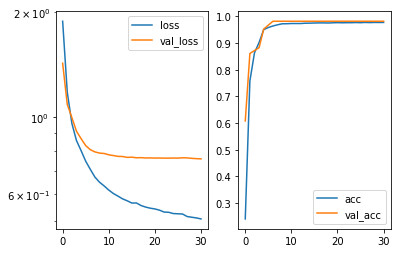

Predicted cell: Normal Probability: [[0.9697325]]
True Cell type: Normal
x [[0.4201877]]
True positional value x 0.5
y [[0.5374322]]
True positional value y 0.5


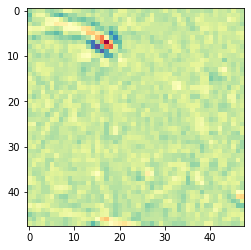

Epoch 32/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5120 - acc: 0.9768 - val_loss: 0.7571 - val_acc: 0.9817

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7571386983106424, 'val_acc': 0.9816849882349427, 'loss': 0.5120328050322515, 'acc': 0.9768339888009325, 'lr': 1e-06}


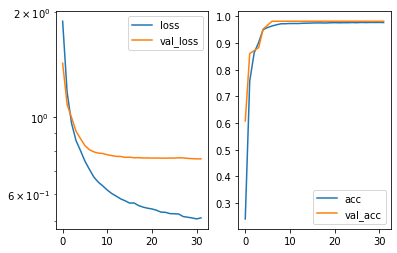

Predicted cell: Normal Probability: [[0.9878137]]
True Cell type: Normal
x [[0.5426755]]
True positional value x 0.5
y [[0.50283384]]
True positional value y 0.5


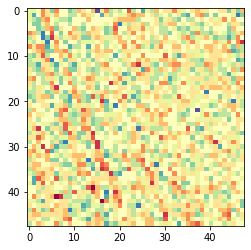

Epoch 33/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5078 - acc: 0.9776 - val_loss: 0.7570 - val_acc: 0.9817

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7570215675420376, 'val_acc': 0.9816849882349427, 'loss': 0.5077823688164641, 'acc': 0.97760618423403, 'lr': 1e-06}


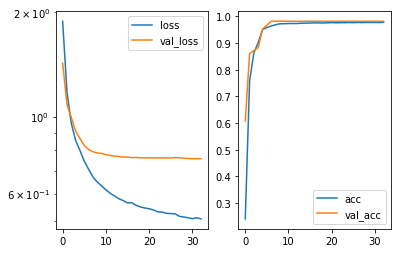

Predicted cell: Cells Probability: [[0.9204238]]
True Cell type: Cells
x [[0.6025295]]
True positional value x 0.5
y [[0.52854794]]
True positional value y 0.2916666666666667


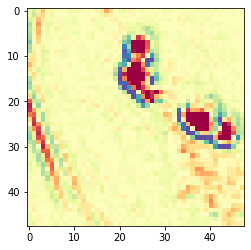

Epoch 34/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5068 - acc: 0.9778 - val_loss: 0.7574 - val_acc: 0.9817

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7574261232610151, 'val_acc': 0.9816849882349427, 'loss': 0.5067603221040895, 'acc': 0.9777992386155147, 'lr': 1e-06}


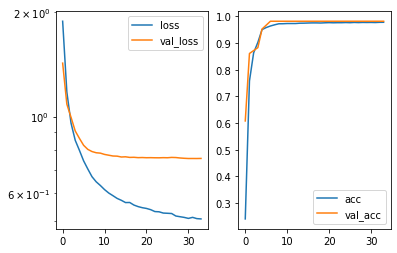

Predicted cell: Cells Probability: [[0.98146445]]
True Cell type: Cells
x [[0.77919465]]
True positional value x 0.7083333333333334
y [[0.22897397]]
True positional value y 0.2916666666666667


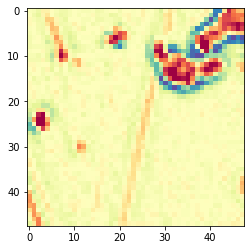

Epoch 35/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5061 - acc: 0.9780 - val_loss: 0.7559 - val_acc: 0.9817

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7558783015488705, 'val_acc': 0.9816849882349427, 'loss': 0.5061492044262904, 'acc': 0.9779922911559292, 'lr': 1e-06}


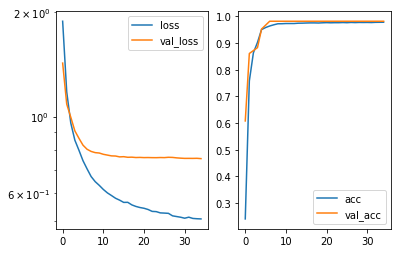

Predicted cell: Cells Probability: [[0.94708997]]
True Cell type: Cells
x [[0.509134]]
True positional value x 0.7083333333333334
y [[0.6583882]]
True positional value y 0.5


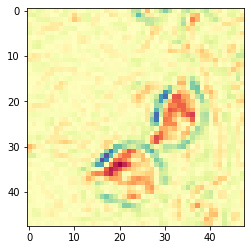

Epoch 36/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5008 - acc: 0.9786 - val_loss: 0.7578 - val_acc: 0.9817

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7577960111282684, 'val_acc': 0.9816849882349427, 'loss': 0.5008453244638259, 'acc': 0.978571440952625, 'lr': 1e-06}


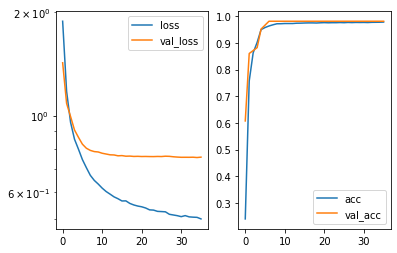

Predicted cell: Cells Probability: [[0.992262]]
True Cell type: Cells
x [[0.6371367]]
True positional value x 0.5
y [[0.65203667]]
True positional value y 0.2916666666666667


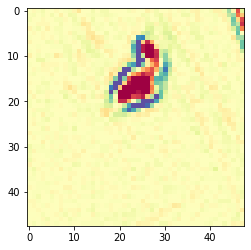

Epoch 37/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5015 - acc: 0.9786 - val_loss: 0.7585 - val_acc: 0.9817

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7584818848323472, 'val_acc': 0.9816849882349427, 'loss': 0.501451997913449, 'acc': 0.9785714386512874, 'lr': 1e-06}


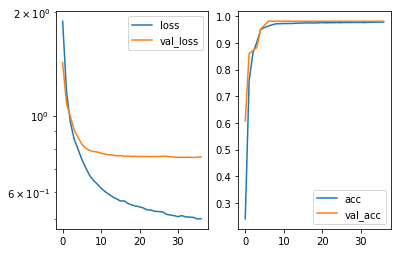

Predicted cell: Cells Probability: [[0.976773]]
True Cell type: Cells
x [[0.32851794]]
True positional value x 0.5
y [[0.5444516]]
True positional value y 0.5


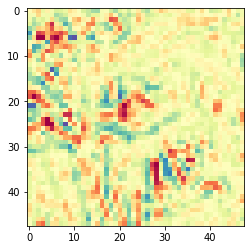

Epoch 38/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4968 - acc: 0.9790 - val_loss: 0.7582 - val_acc: 0.9817

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.758230888363206, 'val_acc': 0.9816849882349427, 'loss': 0.4967734292437211, 'acc': 0.9789575398198426, 'lr': 1e-06}


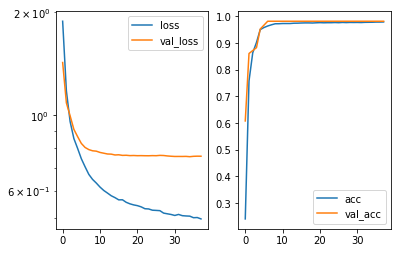

Predicted cell: Cells Probability: [[0.9860243]]
True Cell type: Cells
x [[0.41838577]]
True positional value x 0.7083333333333334
y [[0.32860917]]
True positional value y 0.2916666666666667


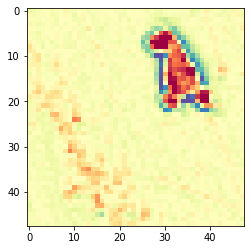

Epoch 39/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4952 - acc: 0.9790 - val_loss: 0.7578 - val_acc: 0.9817

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.757841265681899, 'val_acc': 0.9816849882349427, 'loss': 0.49515070372106484, 'acc': 0.9789575400499764, 'lr': 1e-06}


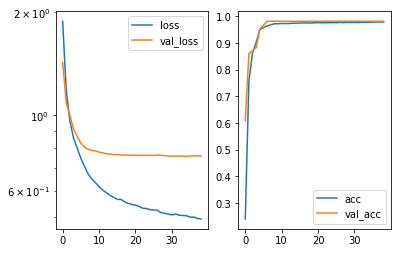

Predicted cell: Cells Probability: [[0.9748378]]
True Cell type: Cells
x [[0.6781242]]
True positional value x 0.7083333333333334
y [[0.43410033]]
True positional value y 0.7083333333333334


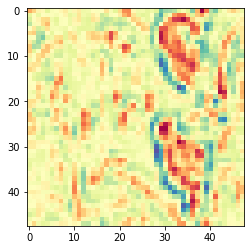

Epoch 40/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4934 - acc: 0.9788 - val_loss: 0.7573 - val_acc: 0.9817

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7572528029972817, 'val_acc': 0.9816849882349427, 'loss': 0.4934256747652665, 'acc': 0.9787644909615683, 'lr': 1e-06}


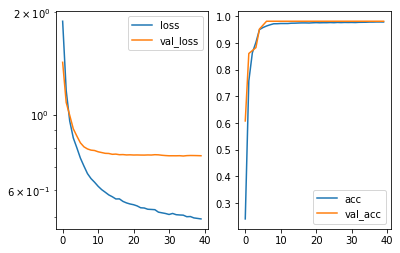

Predicted cell: Cells Probability: [[0.9656488]]
True Cell type: Cells
x [[0.5122731]]
True positional value x 0.5
y [[0.785804]]
True positional value y 0.7083333333333334


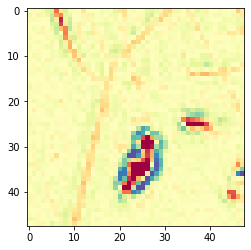

Epoch 41/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4935 - acc: 0.9792 - val_loss: 0.7561 - val_acc: 0.9817

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7560554114016858, 'val_acc': 0.9816849882349427, 'loss': 0.49347970223334764, 'acc': 0.979150588678117, 'lr': 1e-06}


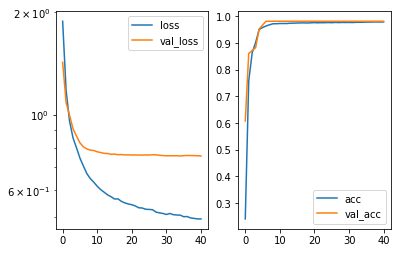

Predicted cell: Cells Probability: [[0.9836421]]
True Cell type: Cells
x [[0.36915812]]
True positional value x 0.5
y [[0.37447912]]
True positional value y 0.5


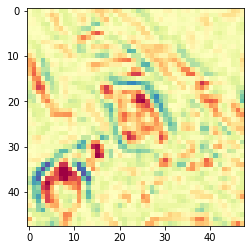

Epoch 42/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4891 - acc: 0.9793 - val_loss: 0.7572 - val_acc: 0.9817

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7571660441793365, 'val_acc': 0.9816849882349427, 'loss': 0.4891232099082019, 'acc': 0.9793436386870601, 'lr': 1e-06}


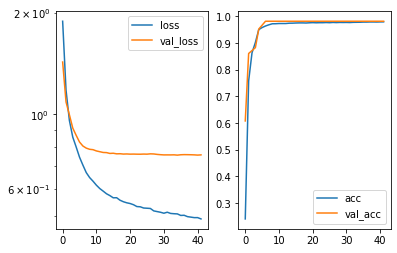

Predicted cell: Cells Probability: [[0.9942326]]
True Cell type: Cells
x [[0.6270871]]
True positional value x 0.2916666666666667
y [[0.38895744]]
True positional value y 0.5


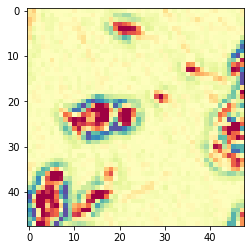

Epoch 43/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4889 - acc: 0.9795 - val_loss: 0.7567 - val_acc: 0.9817

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7567056068133958, 'val_acc': 0.9816849882349427, 'loss': 0.48885546653427214, 'acc': 0.9795366912274748, 'lr': 1e-06}


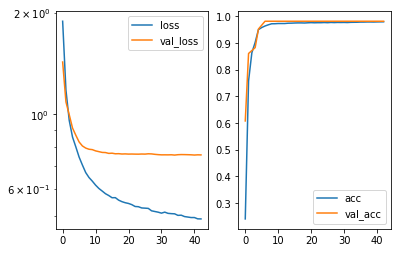

Predicted cell: Normal Probability: [[0.97794294]]
True Cell type: Normal
x [[0.42504644]]
True positional value x 0.5
y [[0.5454089]]
True positional value y 0.5


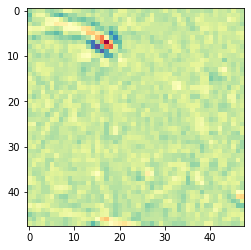

Epoch 44/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4883 - acc: 0.9805 - val_loss: 0.7558 - val_acc: 0.9817

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.755807333158486, 'val_acc': 0.9816849882349427, 'loss': 0.48834239032737997, 'acc': 0.9805019421927257, 'lr': 1e-06}


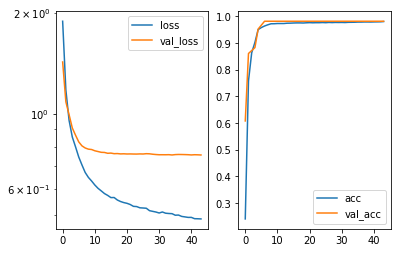

Predicted cell: Cells Probability: [[0.9906714]]
True Cell type: Cells
x [[0.6869007]]
True positional value x 0.7083333333333334
y [[0.26648745]]
True positional value y 0.5


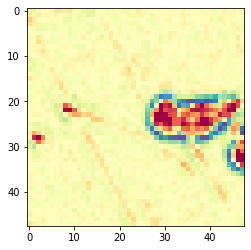

Epoch 45/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4907 - acc: 0.9792 - val_loss: 0.7545 - val_acc: 0.9817

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7545393635501791, 'val_acc': 0.9816849882349427, 'loss': 0.4907231570210696, 'acc': 0.9791505909794546, 'lr': 1e-06}


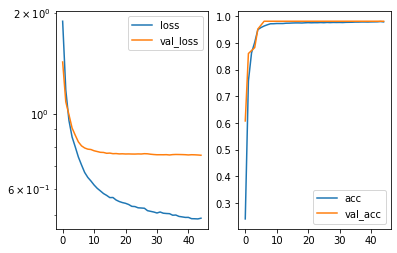

Predicted cell: Cells Probability: [[0.98283374]]
True Cell type: Cells
x [[0.7760029]]
True positional value x 0.7083333333333334
y [[0.68989664]]
True positional value y 0.7083333333333334


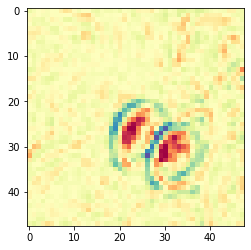

Epoch 46/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4852 - acc: 0.9807 - val_loss: 0.7552 - val_acc: 0.9817

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7552100037917112, 'val_acc': 0.9816849882349427, 'loss': 0.4852174515889878, 'acc': 0.9806949933523377, 'lr': 1e-06}


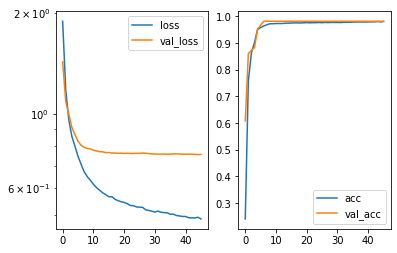

Predicted cell: Cells Probability: [[0.9213522]]
True Cell type: Cells
x [[0.43552724]]
True positional value x 0.5
y [[0.5618237]]
True positional value y 0.5


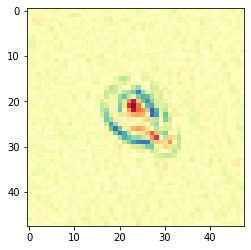

Epoch 47/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4853 - acc: 0.9803 - val_loss: 0.7558 - val_acc: 0.9817

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7558498646750118, 'val_acc': 0.9816849882349427, 'loss': 0.48534710872127285, 'acc': 0.980308888731776, 'lr': 1e-06}


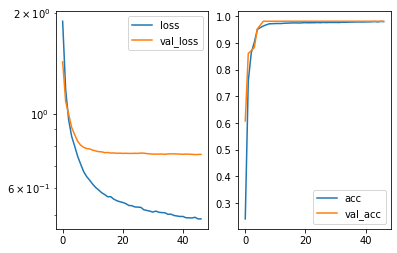

Predicted cell: Cells Probability: [[0.9951929]]
True Cell type: Cells
x [[0.36268574]]
True positional value x 0.2916666666666667
y [[0.44977054]]
True positional value y 0.7083333333333334


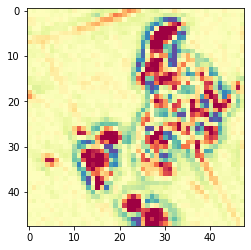

Epoch 48/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4847 - acc: 0.9805 - val_loss: 0.7571 - val_acc: 0.9817

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7571163101074023, 'val_acc': 0.9816849882349427, 'loss': 0.4846955779436472, 'acc': 0.9805019401215218, 'lr': 1e-06}


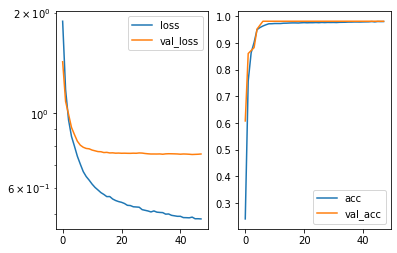

Predicted cell: Cells Probability: [[0.9748513]]
True Cell type: Cells
x [[0.41320604]]
True positional value x 0.5
y [[0.3667034]]
True positional value y 0.2916666666666667


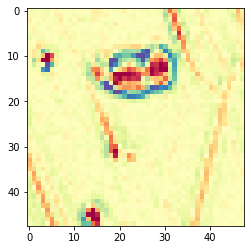

Epoch 49/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4823 - acc: 0.9817 - val_loss: 0.7560 - val_acc: 0.9817

Epoch 00049: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7560375797879565, 'val_acc': 0.9816849882349427, 'loss': 0.48231611380705963, 'acc': 0.9816602376437095, 'lr': 1e-06}


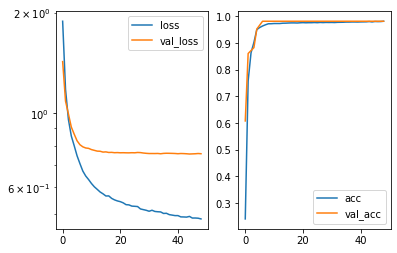

Predicted cell: Cells Probability: [[0.9734674]]
True Cell type: Cells
x [[0.40347576]]
True positional value x 0.2916666666666667
y [[0.68933374]]
True positional value y 0.7083333333333334


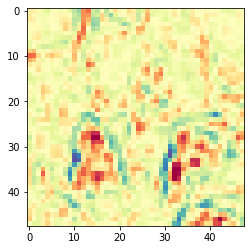

Epoch 50/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4813 - acc: 0.9815 - val_loss: 0.7550 - val_acc: 0.9817

Epoch 00050: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7549691663120256, 'val_acc': 0.9816849882349427, 'loss': 0.48128542258012247, 'acc': 0.9814671933881104, 'lr': 1e-06}


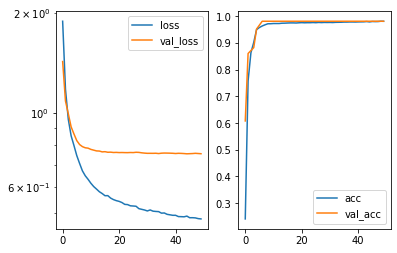

Predicted cell: Cells Probability: [[0.99641466]]
True Cell type: Cells
x [[0.3039653]]
True positional value x 0.5
y [[0.27931142]]
True positional value y 0.2916666666666667


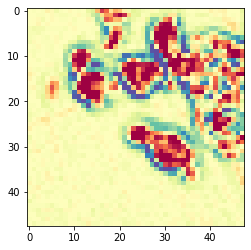

Epoch 51/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4796 - acc: 0.9811 - val_loss: 0.7553 - val_acc: 0.9817

Epoch 00051: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7552577462388482, 'val_acc': 0.9816849882349427, 'loss': 0.47958455364216246, 'acc': 0.9810810887675487, 'lr': 1e-06}


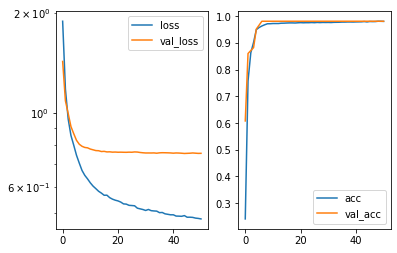

Predicted cell: Cells Probability: [[0.99064165]]
True Cell type: Cells
x [[0.8668331]]
True positional value x 0.7083333333333334
y [[0.72309977]]
True positional value y 0.5


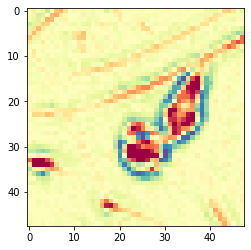

Epoch 52/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4810 - acc: 0.9819 - val_loss: 0.7555 - val_acc: 0.9817

Epoch 00052: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7555323070658869, 'val_acc': 0.9816849882349427, 'loss': 0.48100688259573976, 'acc': 0.9818532934059968, 'lr': 1e-06}


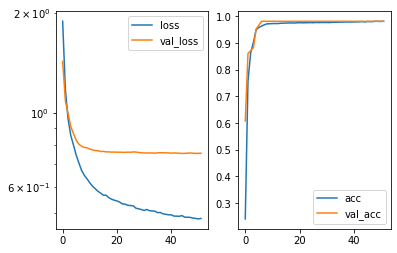

Predicted cell: Cells Probability: [[0.8795681]]
True Cell type: Cells
x [[0.5027106]]
True positional value x 0.7083333333333334
y [[0.4107015]]
True positional value y 0.2916666666666667


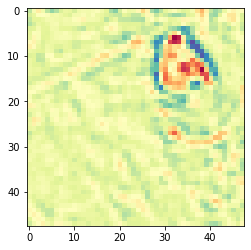

Epoch 53/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4773 - acc: 0.9815 - val_loss: 0.7536 - val_acc: 0.9817

Epoch 00053: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7535875481126946, 'val_acc': 0.9816849882349427, 'loss': 0.47726216946789657, 'acc': 0.9814671933881104, 'lr': 1e-06}


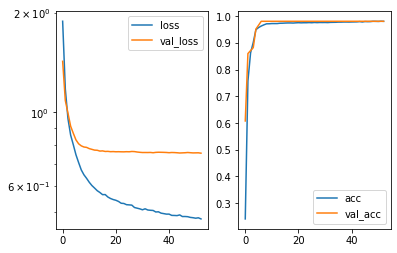

Predicted cell: Cells Probability: [[0.9648254]]
True Cell type: Cells
x [[0.38698894]]
True positional value x 0.2916666666666667
y [[0.5332233]]
True positional value y 0.2916666666666667


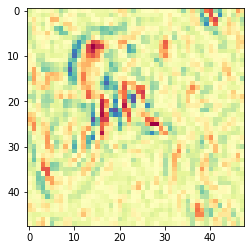

Epoch 54/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4759 - acc: 0.9830 - val_loss: 0.7531 - val_acc: 0.9817

Epoch 00054: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7531165000283238, 'val_acc': 0.9816849882349427, 'loss': 0.47594298911370825, 'acc': 0.9830115934596558, 'lr': 1e-06}


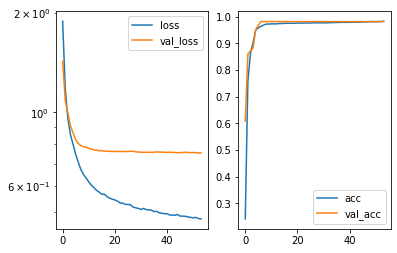

Predicted cell: Cells Probability: [[0.9653667]]
True Cell type: Cells
x [[0.36208698]]
True positional value x 0.2916666666666667
y [[0.7695708]]
True positional value y 0.7083333333333334


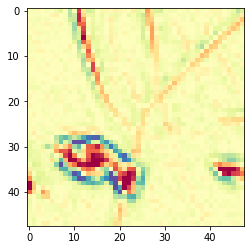

Epoch 55/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4760 - acc: 0.9830 - val_loss: 0.7544 - val_acc: 0.9817

Epoch 00055: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7543981116769951, 'val_acc': 0.9816849882349427, 'loss': 0.4760446358601559, 'acc': 0.9830115900076494, 'lr': 1e-06}


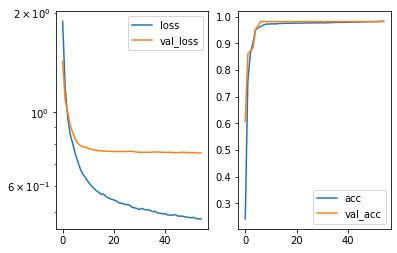

Predicted cell: Cells Probability: [[0.9809326]]
True Cell type: Cells
x [[0.57083774]]
True positional value x 0.2916666666666667
y [[0.7062306]]
True positional value y 0.5


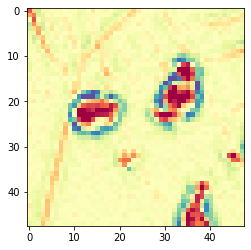

Epoch 56/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4755 - acc: 0.9834 - val_loss: 0.7543 - val_acc: 0.9853

Epoch 00056: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7543235349131154, 'val_acc': 0.9853479938629346, 'loss': 0.4755283261588181, 'acc': 0.9833976934775422, 'lr': 1e-06}


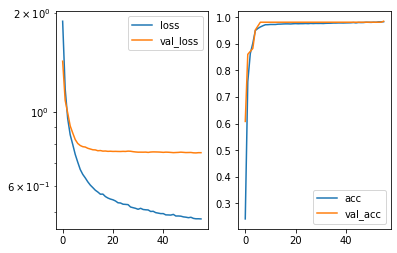

Predicted cell: Cells Probability: [[0.99409467]]
True Cell type: Cells
x [[0.6345269]]
True positional value x 0.5
y [[0.6630353]]
True positional value y 0.2916666666666667


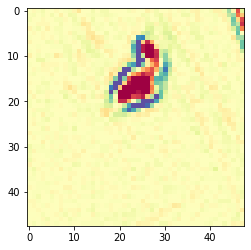

Epoch 57/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4738 - acc: 0.9842 - val_loss: 0.7536 - val_acc: 0.9817

Epoch 00057: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7535506115728245, 'val_acc': 0.9816849882349427, 'loss': 0.47384515657848375, 'acc': 0.9841698960447863, 'lr': 1e-06}


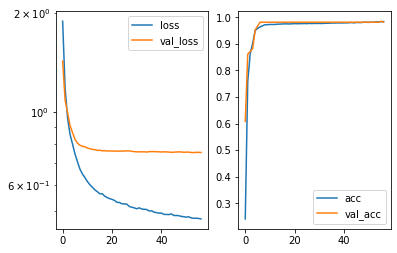

Predicted cell: Cells Probability: [[0.99427396]]
True Cell type: Cells
x [[0.6367596]]
True positional value x 0.5
y [[0.66116375]]
True positional value y 0.2916666666666667


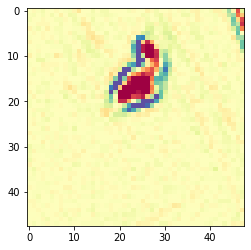

Epoch 58/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4726 - acc: 0.9836 - val_loss: 0.7534 - val_acc: 0.9817

Epoch 00058: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7533629248430441, 'val_acc': 0.9816849882349427, 'loss': 0.472625935860122, 'acc': 0.9835907423358166, 'lr': 1e-06}


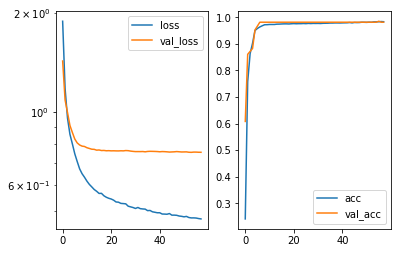

Predicted cell: Cells Probability: [[0.98857087]]
True Cell type: Cells
x [[0.57254344]]
True positional value x 0.7083333333333334
y [[0.72699463]]
True positional value y 0.7083333333333334


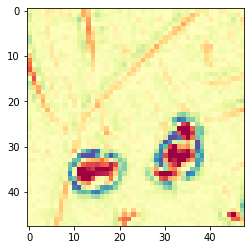

Epoch 59/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4702 - acc: 0.9859 - val_loss: 0.7530 - val_acc: 0.9853

Epoch 00059: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7530415988230443, 'val_acc': 0.9853479938629346, 'loss': 0.4702361755389504, 'acc': 0.9859073470458101, 'lr': 1e-06}


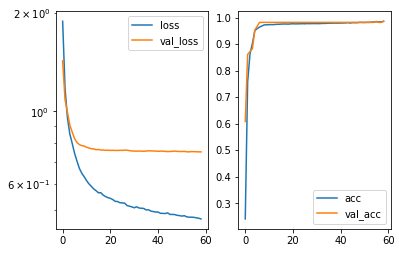

Predicted cell: Cells Probability: [[0.9884741]]
True Cell type: Cells
x [[0.5709855]]
True positional value x 0.7083333333333334
y [[0.7278865]]
True positional value y 0.7083333333333334


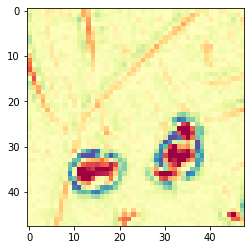

Epoch 60/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4729 - acc: 0.9836 - val_loss: 0.7528 - val_acc: 0.9853

Epoch 00060: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7527674770617223, 'val_acc': 0.9853479938629346, 'loss': 0.47292267275132727, 'acc': 0.983590744867288, 'lr': 1e-06}


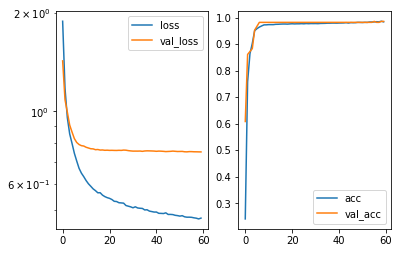

Predicted cell: Cells Probability: [[0.9676212]]
True Cell type: Cells
x [[0.390692]]
True positional value x 0.2916666666666667
y [[0.53165126]]
True positional value y 0.2916666666666667


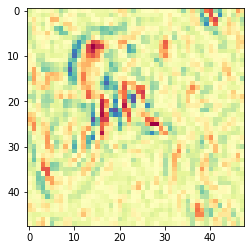

Epoch 61/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4719 - acc: 0.9857 - val_loss: 0.7518 - val_acc: 0.9817

Epoch 00061: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7517827913001344, 'val_acc': 0.9816849882349427, 'loss': 0.4718762893934508, 'acc': 0.9857142935848604, 'lr': 1e-06}


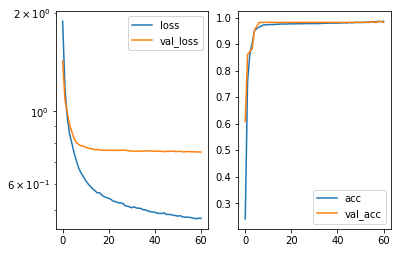

Predicted cell: Cells Probability: [[0.9909025]]
True Cell type: Cells
x [[0.5210355]]
True positional value x 0.7083333333333334
y [[0.5396001]]
True positional value y 0.5


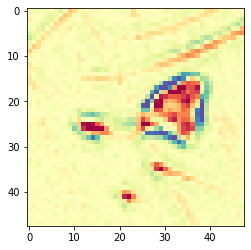

Epoch 62/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4679 - acc: 0.9871 - val_loss: 0.7524 - val_acc: 0.9817

Epoch 00062: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7524437535376776, 'val_acc': 0.9816849882349427, 'loss': 0.46794537779907464, 'acc': 0.9870656447981315, 'lr': 1e-06}


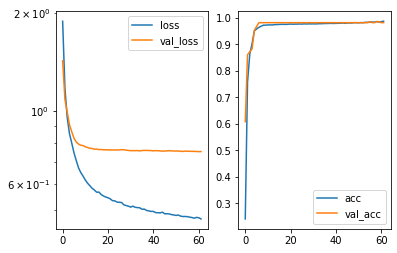

Predicted cell: Cells Probability: [[0.9914385]]
True Cell type: Cells
x [[0.8695362]]
True positional value x 0.7083333333333334
y [[0.71804565]]
True positional value y 0.5


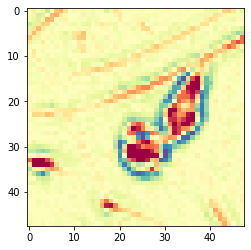

Epoch 63/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4669 - acc: 0.9869 - val_loss: 0.7528 - val_acc: 0.9853

Epoch 00063: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.752846632248316, 'val_acc': 0.9853479938629346, 'loss': 0.46694748868813385, 'acc': 0.9868725982411948, 'lr': 1e-06}


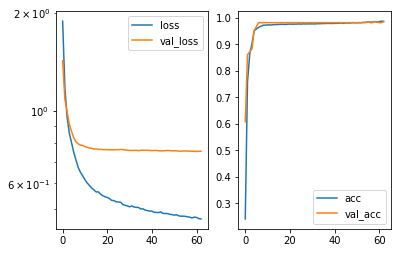

Predicted cell: Cells Probability: [[0.9684332]]
True Cell type: Cells
x [[0.39571854]]
True positional value x 0.2916666666666667
y [[0.5782629]]
True positional value y 0.5


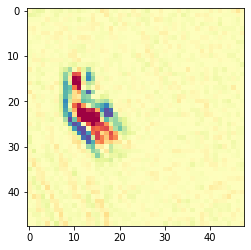

Epoch 64/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4667 - acc: 0.9869 - val_loss: 0.7518 - val_acc: 0.9853

Epoch 00064: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7518235591305045, 'val_acc': 0.9853479938629346, 'loss': 0.46666840846474106, 'acc': 0.9868725950193221, 'lr': 1e-06}


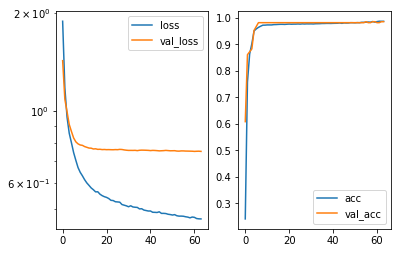

Predicted cell: Cells Probability: [[0.9714163]]
True Cell type: Cells
x [[0.51375663]]
True positional value x 0.5
y [[0.79548544]]
True positional value y 0.7083333333333334


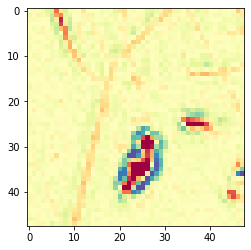

Epoch 65/250
2800/5180 [===============>..............] - ETA: 3s - loss: 0.4653 - acc: 0.9893

In [ ]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
